In [1]:
from RAG import RAG
import numpy as np
import matplotlib.pyplot as plt

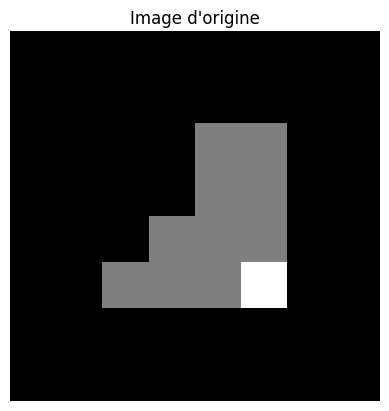

In [2]:
img = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 127, 127, 0, 0],
    [0, 0, 0, 0, 127, 127, 0, 0],
    [0, 0, 0, 127, 127, 127, 0, 0],
    [0, 0, 127, 127, 127, 255, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
    ], dtype=int)

plt.title("Image d'origine")
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

# Partie I : Division

L'arbre de la division de l'image :
     ┌─ 1
     │     ┌─ 5
     ├─ 2 ─┼─ 6
     │     ├─ 7
     │     └─ 8
     │     ┌─ 9
     │     │      ┌─ 17
─ 0 ─┤     ├─ 10 ─┼─ 18
     ├─ 3 ─┤      ├─ 19
     │     │      └─ 20
     │     ├─ 11
     │     └─ 12
     │            ┌─ 21
     │     ┌─ 13 ─┼─ 22
     │     │      ├─ 23
     └─ 4 ─┤      └─ 24
           ├─ 14
           ├─ 15
           └─ 16
Le nombre de noeuds dans l'arbre :
25


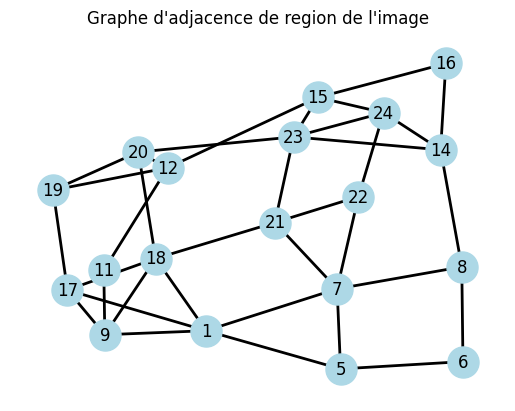

Le dictionnaire d'adjacence du RAG :
  1 : [18, 9, 5, 17, 7]
  5 : [7, 6, 1]
  6 : [8, 5]
  7 : [5, 22, 1, 8, 21]
  8 : [6, 14, 7]
  9 : [17, 11, 1, 18]
 11 : [9, 12]
 12 : [19, 15, 20, 11]
 14 : [16, 24, 8, 23]
 15 : [24, 23, 12, 16]
 16 : [14, 15]
 17 : [9, 18, 1, 19]
 18 : [20, 17, 1, 9, 21]
 19 : [12, 20, 17]
 20 : [18, 23, 19, 12]
 21 : [22, 18, 23, 7]
 22 : [21, 7, 24]
 23 : [20, 15, 24, 21, 14]
 24 : [15, 23, 14, 22]


In [3]:
# Division
graphe = RAG(img)
graphe.split()

# Affichage de l'arbre
graphe.print_quad_tree()
print("Le nombre de noeuds dans l'arbre :")
print(graphe.get_tree_size())

# Dessin du graphe
graphe.plot_graph()

# La représentation du graphe sous forme de dictionnaire d'adjacence
# Utile pour la 2eme partie (fusion)
print("Le dictionnaire d'adjacence du RAG :")
adj_dict = graphe.get_adj_dict()
for vertex in adj_dict:
    print(f"{vertex:3} : {adj_dict[vertex]}")

# Partie II : Fusion

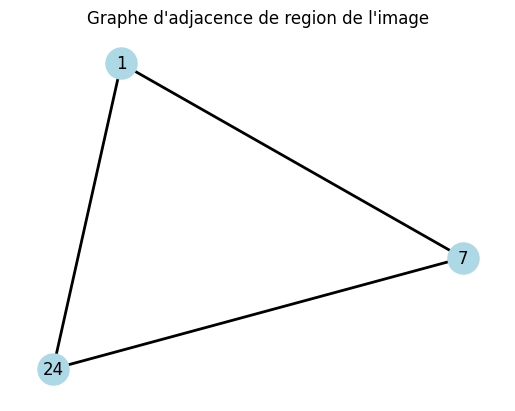

Le dictionnaire d'adjacence du RAG :
  1 : [7, 24]
  7 : [1, 24]
 24 : [1, 7]


In [4]:
# Fusion
graphe.merge()
graphe.plot_graph()
print("Le dictionnaire d'adjacence du RAG :")
adj_dict = graphe.get_adj_dict()
for vertex in adj_dict:
    print(f"{vertex:3} : {adj_dict[vertex]}")

# Partie III : Segmentation de l'image

In [9]:
# L'arbre contient la trace de notre travail
# elle fera le travail d'index danse
for node in graphe.get_adj_dict():
    print(f"{node:2} -> {graphe.get_segment_components(node)}")   

 1 -> [1, 9, 5, 17, 6, 11, 8, 12, 14, 15, 16]
 7 -> [7, 22, 21, 18, 23, 20, 19]
24 -> [24]
